In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
experiment_df = pd.read_csv("output/all-profile-metadata.csv")
experiment_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,aperture,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Size_MB,Size_MB_std,channel_names,brightfield_z_plane_used,feature_channels_found
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,NaN,1,10,6,...,0.45,dry,NaN,NaN,4,52.476334,0.000144,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA"
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.45,dry,NaN,NaN,4,52.476514,0.000183,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA"
2,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.45,dry,NaN,NaN,4,52.476631,0.000142,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA"
3,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.75,dry,NaN,NaN,4,52.476629,0.000114,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA"
4,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,9,NaN,1,20,6,...,0.75,dry,NaN,NaN,9,52.476334,0.000153,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,1.00,water,no,2.0,4,8.003585,0.000044,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA"
180,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,1.00,water,no,2.0,4,8.003585,0.000044,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA"
181,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,1.00,water,yes,4.0,4,7.954439,0.000583,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA"
182,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,1.00,water,yes,1.0,4,8.003584,0.000014,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA"


In [97]:

def same_test(experiment_metadata, profile_parent_dir1, profile_parent_dir2, batch_col="Batch"):
    """
    For two divergent profiles, check what is the same and what has changed. 

    batch_col is the name of the column to distinguish the profile parent folder. Eg. "Scope1_MolDev_10X" or "1siteSubSample_Scope1_MolDev_10X"
    Output df will also use this batch_col name
    """

    for ind, a_vendor in enumerate(experiment_metadata["Vendor"].unique()):
        print(f"Processing {a_vendor}")
        vendor_data = experiment_metadata.loc[experiment_metadata["Vendor"] == a_vendor]
        for a_batch in vendor_data[batch_col].unique():
            batch_data = vendor_data.loc[vendor_data[batch_col] == a_batch]
            for a_plate in batch_data["Assay_Plate_Barcode"].unique():
                # plate_data = batch_data.loc[batch_data["Assay_Plate_Barcode"] == a_plate]
                # data_path1 = os.path.join(profile_parent_dir1, a_batch, a_plate, a_plate+"_normalized_feature_select_negcon_batch.csv.gz")
                # data_path2 = os.path.join(profile_parent_dir2, a_batch, a_plate, a_plate+"_normalized_feature_select_negcon_batch.csv.gz")
                data_path1 = os.path.join(profile_parent_dir1, a_batch, a_plate, a_plate+".csv.gz")
                data_path2 = os.path.join(profile_parent_dir2, a_batch, a_plate, a_plate+".csv.gz")
                load_data1 = pd.read_csv(data_path1)
                load_data2 = pd.read_csv(data_path2)
                # diff_cols = set(load_data1.columns) - set(load_data2.columns)
                # diff_cols = set(load_data2.columns) - set(load_data1.columns)
                diff_cols = load_data1.columns.symmetric_difference(load_data2.columns)
                diff_cols = {i for i in load_data2.columns if "Image" not in i}
                same_cols = load_data1.columns.intersection(load_data2.columns)
                same_cols = {i for i in load_data2.columns if "Metadata" in i}
                print(same_cols)

same_test(experiment_df[experiment_df["Assay_Plate_Barcode"] == "CP_Broad_Phenix_C_BIN1_1Plane_P1"], "../jump-scope/profiles", "../jump-scope/profiles-with-image-features")


Processing PE
{'Metadata_Plate', 'Metadata_Count_Cells', 'Metadata_Site_Count', 'Metadata_Count_Cytoplasm', 'Metadata_Object_Count', 'Metadata_Count_Nuclei', 'Metadata_Well'}
{'Metadata_Plate', 'Metadata_Count_Cells', 'Metadata_Site_Count', 'Metadata_Count_Cytoplasm', 'Metadata_Object_Count', 'Metadata_Count_Nuclei', 'Metadata_Well'}
{'Metadata_Plate', 'Metadata_Count_Cells', 'Metadata_Site_Count', 'Metadata_Count_Cytoplasm', 'Metadata_Object_Count', 'Metadata_Count_Nuclei', 'Metadata_Well'}


In [5]:
# Add the metadata from the updated profiles to profiles_original
import glob

def add_metadata(experiment_metadata, original_profiles, updated_profiles):
    """
    Helper function to add the metadata from updated_profiles to original_profiles
    """
    for ind, a_vendor in enumerate(experiment_metadata["Vendor"].unique()):
        print(f"Processing {a_vendor}")
        vendor_data = experiment_metadata.loc[experiment_metadata["Vendor"] == a_vendor]
        for a_batch in vendor_data["Batch"].unique():
            if "siteSub" not in a_batch:
                batch_data = vendor_data.loc[vendor_data["Batch"] == a_batch]
                for a_plate in batch_data["Assay_Plate_Barcode"].unique():
                    print(a_batch, a_plate)
                    orig_paths = glob.glob(os.path.join(original_profiles, a_batch, a_plate, a_plate+"*.csv.gz"))
                    meta_path = os.path.join(updated_profiles, a_batch, a_plate, a_plate+".csv.gz")
                    meta_df = pd.read_csv(meta_path)
                    merge_cols = [i for i in meta_df.columns if "Metadata" in i]
                    print(merge_cols)
                    on_cols = ["Metadata_Well", "Metadata_Plate"]
                    for orig_csv in orig_paths:
                        orig_df = pd.read_csv(orig_csv)
                        orig_df = orig_df.merge(meta_df[merge_cols], on=on_cols)
                        orig_df.to_csv(orig_csv, index=False)

add_metadata(experiment_df, "../jump-scope/profiles", "../jump-scope/profiles-with-image-features")

Processing MolDev
Scope1_MolDev_10X Plate2_PCO_6ch_4site_10XPA
['Metadata_Plate', 'Metadata_Well', 'Metadata_Site_Count', 'Metadata_Count_Cells', 'Metadata_Count_CellsSmall', 'Metadata_Count_Cytoplasm', 'Metadata_Count_CytoplasmSmall', 'Metadata_Count_Nuclei', 'Metadata_Count_NucleiSmall', 'Metadata_Object_Count']
Scope1_MolDev_10X Plate3_PCO_6ch_4site_10XPA_Crest
['Metadata_Plate', 'Metadata_Well', 'Metadata_Site_Count', 'Metadata_Count_Cells', 'Metadata_Count_CellsSmall', 'Metadata_Count_Cytoplasm', 'Metadata_Count_CytoplasmSmall', 'Metadata_Count_Nuclei', 'Metadata_Count_NucleiSmall', 'Metadata_Object_Count']
Scope1_MolDev_10X_4siteZ Plate3_PCO_6ch_4site_10XPA_Crestz
['Metadata_Plate', 'Metadata_Well', 'Metadata_Site_Count', 'Metadata_Count_Cells', 'Metadata_Count_CellsSmall', 'Metadata_Count_Cytoplasm', 'Metadata_Count_CytoplasmSmall', 'Metadata_Count_Nuclei', 'Metadata_Count_NucleiSmall', 'Metadata_Object_Count']
Scope1_MolDev_20X_4site Plate3_PCO_6ch_4site_20XPA_Crestz
['Metadata

In [ ]:
df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles/Scope1_Yokogawa_US_40X_BRO0117059/BRO0117059_40x/BRO0117059_40x.csv.gz")
[i for i in df.columns if "Metadata" in i]

In [4]:
# Check that well/plate information (for cell counts) aligns as expected

df_orig = pd.read_csv("checkpoints/match_rep_df.csv")
df_new = pd.read_csv("checkpoints/match_rep_df-image-features.csv")

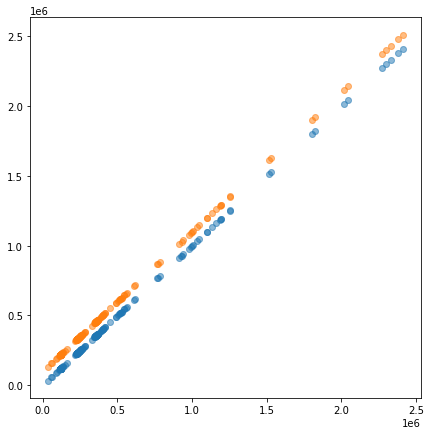

In [32]:
# Compare the cell counts for different datasets 
# Looks good.

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(df_orig["cell_count"], df_orig["cell_count"], alpha=0.3)
ax.scatter(df_new["cell_count"], df_new["cell_count"]+0.1e6, alpha=0.3)